In [96]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [97]:
#Read cleaned csv file
df = pd.read_csv("../data_cleaning/OSMI_clean.csv")
df.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),...,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,Start Date (UTC),Submit Date (UTC)
0,1.0,No,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Yes,...,100-500,1.0,"Yes, I experienced","Yes, I experienced",27.0,Female,United Kingdom,NaN,2018-05-16 12:32:04,2018-05-16 12:42:40
1,1.0,Yes,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Maybe,...,100-500,2.0,"Yes, I observed",Maybe/Not sure,31.0,male,United Kingdom,NaN,2018-05-16 12:31:13,2018-05-16 12:40:40
2,1.0,I don't know,No,Yes,Yes,Yes,1.0,Yes,Difficult,Yes,...,6-25,1.0,"Yes, I experienced","Yes, I experienced",36.0,male,United States of America,White,2018-05-09 05:34:05,2018-05-09 05:46:04
3,1.0,Yes,Yes,Yes,Yes,I don't know,1.0,Yes,Difficult,Yes,...,More than 1000,2.0,Maybe/Not sure,Maybe/Not sure,22.0,Male,United States of America,White,2018-05-04 23:19:14,2018-05-04 23:23:23
4,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,1.0,No,"Yes, I observed",52.0,female,United States of America,More than one of the above,2018-05-03 00:40:24,2018-05-03 00:53:20


In [98]:
#filter for only tech companies first
df = df[(df["tech company"]==1.0)]

#create two dataframes for plotting by narrowing down df to necessary columns
df_anonymity = df[["current mental health disorder","anonymity protected when using benefits"]]
df_leave = df[["current mental health disorder","ease of asking for leave"]]
print(df_anonymity.head())
print(df_leave.head())

  current mental health disorder anonymity protected when using benefits
0                       Possibly                            I don't know
1                       Possibly                            I don't know
2                            Yes                                     Yes
3                            Yes                                     Yes
5                             No                                     Yes
  current mental health disorder ease of asking for leave
0                       Possibly             I don't know
1                       Possibly             I don't know
2                            Yes                Difficult
3                            Yes                Difficult
5                             No            Somewhat easy


In [99]:
#drop rows with missing data
df_anonymity = df_anonymity.dropna()
df_leave = df_leave.dropna()

In [100]:
anonymity_groupby = df_anonymity.groupby("anonymity protected when using benefits")["current mental health disorder"].value_counts()
anonymity_groupby_df = pd.DataFrame(anonymity_groupby)
leave_groupby = df_leave.groupby("ease of asking for leave")["current mental health disorder"].value_counts()
leave_groupby_df = pd.DataFrame(leave_groupby)
print(leave_groupby_df)

                                                           count
ease of asking for leave   current mental health disorder       
Difficult                  Yes                                39
                           Possibly                           20
                           No                                 15
                           Don't Know                          4
I don't know               Yes                                60
                           No                                 46
                           Possibly                           34
                           Don't Know                         17
Neither easy nor difficult Yes                                40
                           No                                 40
                           Possibly                           32
                           Don't Know                         12
Somewhat difficult         Yes                                33
                         

In [101]:
#calculate percentages for each value in the group
#code for calculating percentage of group
#https://stackoverflow.com/questions/75090908/pandas-matplotlib-bar-plot-with-multi-index-dataframe
anonymity_groupby_df["percent of group"] = (anonymity_groupby_df
                                            .groupby(by="anonymity protected when using benefits",group_keys=False)
                                            .apply(lambda anonymity_groupby_df: anonymity_groupby_df / anonymity_groupby_df.sum() * 100))

leave_groupby_df["percent of group"] = (leave_groupby_df
                                        .groupby(by="ease of asking for leave",group_keys=False)
                                        .apply(lambda leave_groupby_df: leave_groupby_df / leave_groupby_df.sum() * 100))
leave_groupby_df

count  \
ease of asking for leave   current mental health disorder          
Difficult                  Yes                                39   
                           Possibly                           20   
                           No                                 15   
                           Don't Know                          4   
I don't know               Yes                                60   
                           No                                 46   
                           Possibly                           34   
                           Don't Know                         17   
Neither easy nor difficult Yes                                40   
                           No                                 40   
                           Possibly                           32   
                           Don't Know                         12   
Somewhat difficult         Yes                                33   
                           Possibly                           30   
                           No                                 25   
                           Don't Know                          8   
Somewhat easy              Yes                               122   
                           No                                 76   
                           Possibly                           41   
                           Don't Know                         18   
Very easy                  No                                 91   
                           Yes                                81   
                           Possibly                           34   
                           Don't Know                         21   

                                                           percent of group  
ease of asking for leave   current mental health disorder                    
Difficult                  Yes                                    50.000000  
                           Possibly                               25.641026  
                           No                                     19.230769  
                           Don't Know                              5.128205  
I don't know               Yes                                    38.216561  
                           No                                     29.299363  
                           Possibly                               21.656051  
                           Don't Know                             10.828025  
Neither easy nor difficult Yes                                    32.258065  
                           No                                     32.258065  
                           Possibly                               25.806452  
                           Don't Know                              9.677419  
Somewhat difficult         Yes                                    34.375000  
                           Possibly                               31.250000  
                           No                                     26.041667  
                           Don't Know                              8.333333  
Somewhat easy              Yes                                    47.470817  
                           No                                     29.571984  
                           Possibly                               15.953307  
                           Don't Know                              7.003891  
Very easy                  No                                     40.088106  
                           Yes                                    35.682819  
                           Possibly                               14.977974  
                           Don't Know                              9.251101

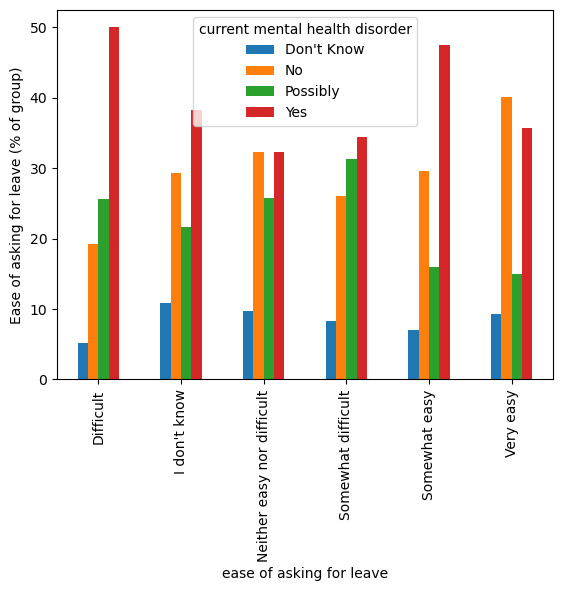

In [102]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart
#bar chart for ease of asking for leave
leave_groupby_df["percent of group"].unstack().plot(kind='bar')
plt.ylabel("Ease of asking for leave (% of group)")
plt.savefig("ease_of_asking_leave.png")


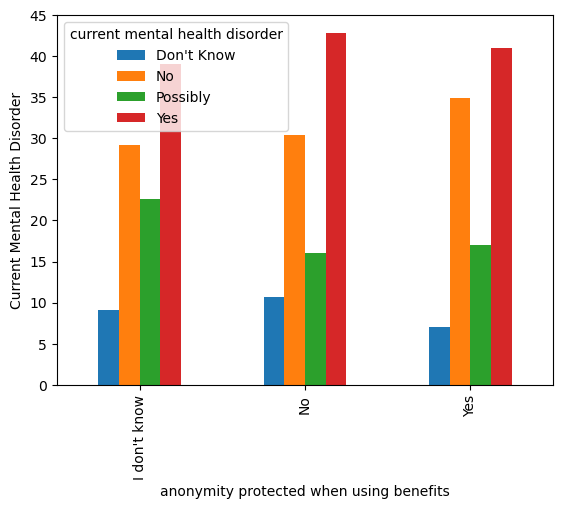

In [103]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart
#bar chart for ease of asking for leave
anonymity_groupby_df["percent of group"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder")
plt.savefig("anonymity_protected_bar.png")